Gustavo de Oliveira Martins - 12625531

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.



**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split




df = pd.read_csv("/content/sneeze1.csv")
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [176]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

negrito
**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


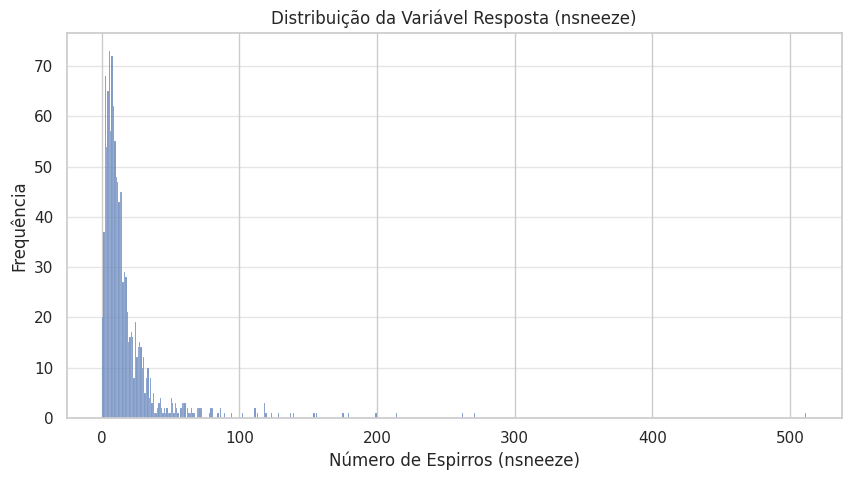

Média de nsneeze: 17.09
Variância de nsneeze: 758.30
Proporção de zeros: 1.67%


In [177]:
plt.figure(figsize=(10, 5))
sns.histplot(df['nsneeze'], bins=max(df['nsneeze']) + 1, kde=False, stat="count")
plt.title('Distribuição da Variável Resposta (nsneeze)')
plt.xlabel('Número de Espirros (nsneeze)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Média de nsneeze: {df['nsneeze'].mean():.2f}")
print(f"Variância de nsneeze: {df['nsneeze'].var():.2f}")
print(f"Proporção de zeros: {(df['nsneeze'] == 0).mean():.2%}")

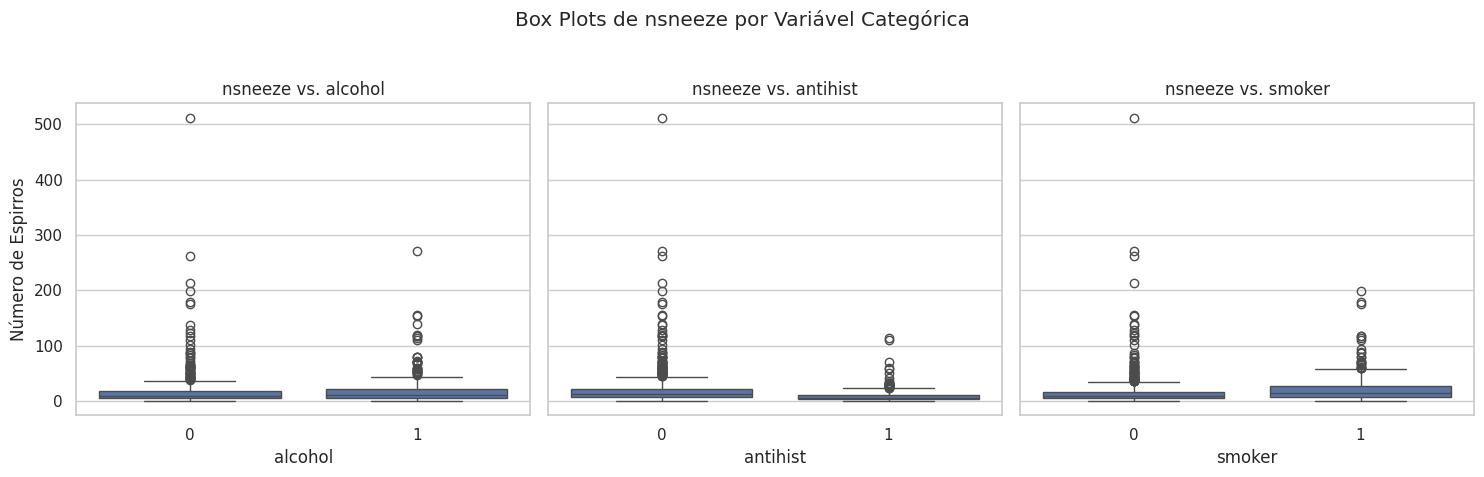


--- Média de nsneeze por categoria ---
alcohol
0    16.122473
1    19.367688
Name: Média de nsneeze para alcohol, dtype: float64
antihist
0    19.668151
1     9.437086
Name: Média de nsneeze para antihist, dtype: float64
smoker
0    15.359712
1    24.524229
Name: Média de nsneeze para smoker, dtype: float64


In [178]:
binary_vars = ['alcohol', 'antihist', 'smoker']
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Box Plots de nsneeze por Variável Categórica')

for i, var in enumerate(binary_vars):
    sns.boxplot(x=var, y='nsneeze', data=df, ax=axes[i])
    axes[i].set_title(f'nsneeze vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Número de Espirros')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Média de nsneeze por categoria ---")
for var in binary_vars:
    print(df.groupby(var)['nsneeze'].mean().rename(f'Média de nsneeze para {var}'))

/tmp/ipython-input-1346095430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axs[0, 0], palette="Set2")
/tmp/ipython-input-1346095430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axs[0, 1], palette="Set2")
/tmp/ipython-input-1346095430.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axs[0, 2], palette="Set2")


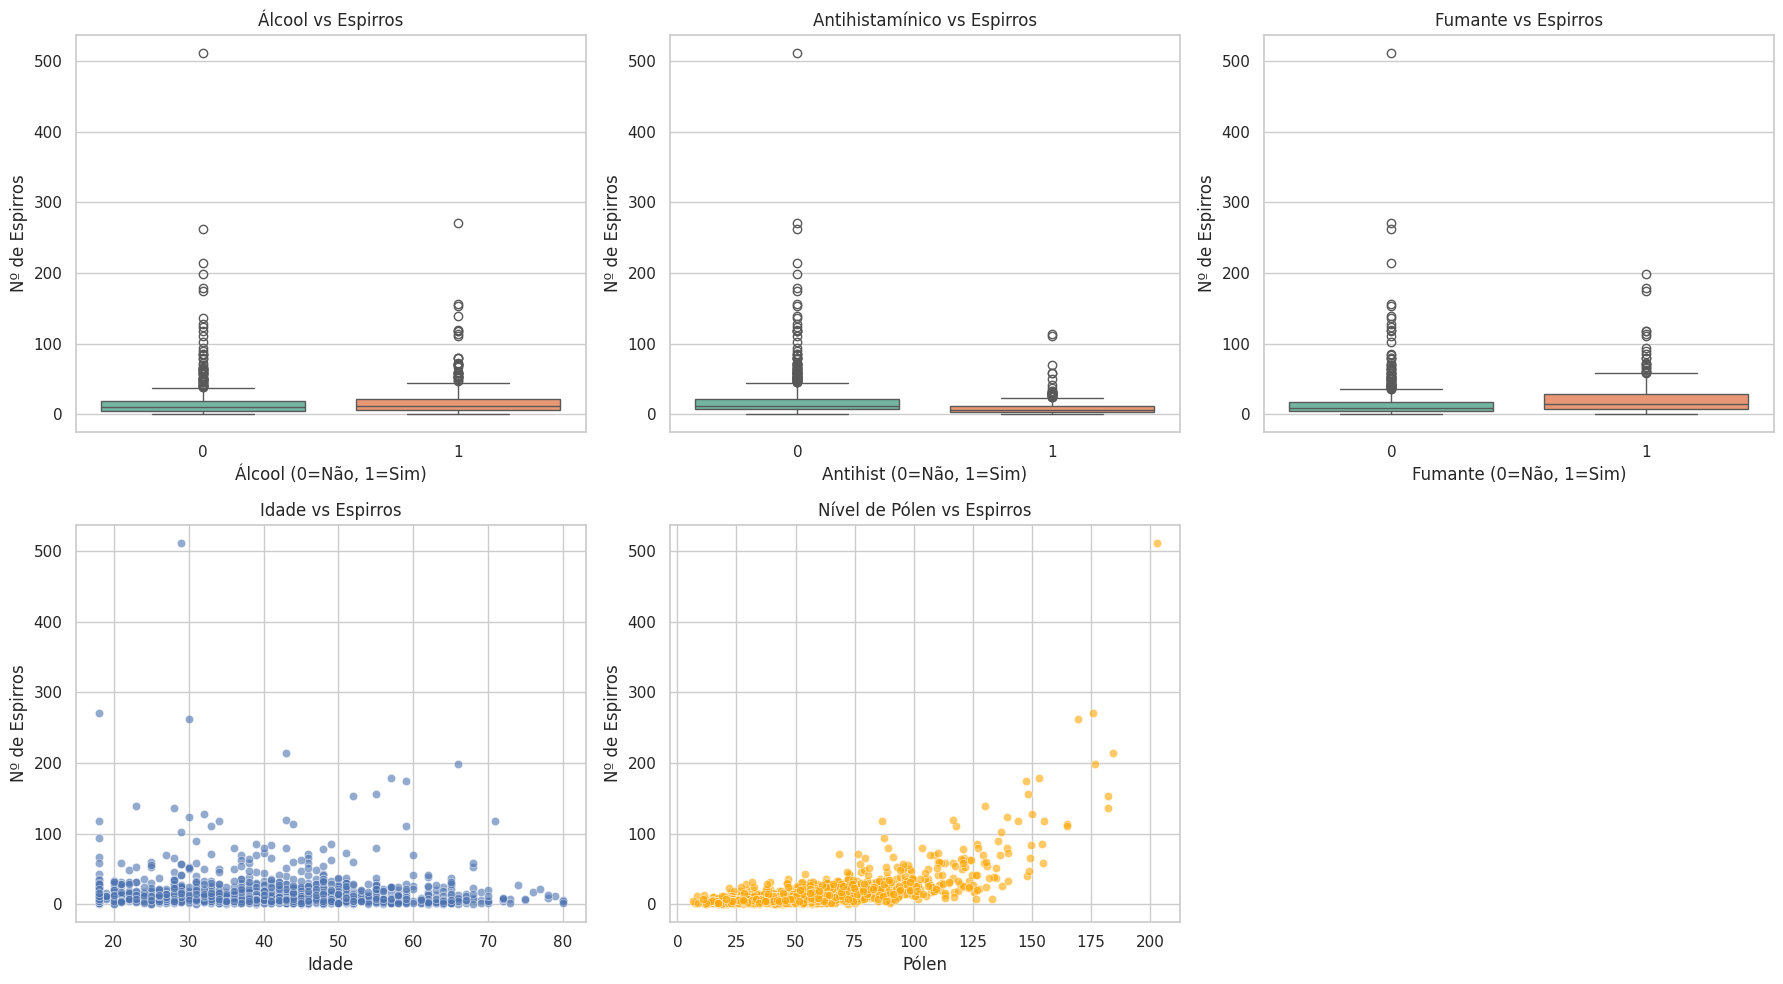

In [179]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x='alcohol', y='nsneeze', data=df, ax=axs[0, 0], palette="Set2")
axs[0, 0].set_title('Álcool vs Espirros')
axs[0, 0].set_xlabel('Álcool (0=Não, 1=Sim)')
axs[0, 0].set_ylabel('Nº de Espirros')

sns.boxplot(x='antihist', y='nsneeze', data=df, ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title('Antihistamínico vs Espirros')
axs[0, 1].set_xlabel('Antihist (0=Não, 1=Sim)')
axs[0, 1].set_ylabel('Nº de Espirros')

sns.boxplot(x='smoker', y='nsneeze', data=df, ax=axs[0, 2], palette="Set2")
axs[0, 2].set_title('Fumante vs Espirros')
axs[0, 2].set_xlabel('Fumante (0=Não, 1=Sim)')
axs[0, 2].set_ylabel('Nº de Espirros')

sns.scatterplot(x='age', y='nsneeze', data=df, ax=axs[1, 0], alpha=0.6)
axs[1, 0].set_title('Idade vs Espirros')
axs[1, 0].set_xlabel('Idade')
axs[1, 0].set_ylabel('Nº de Espirros')

sns.scatterplot(x='pollen', y='nsneeze', data=df, ax=axs[1, 1], alpha=0.6, color='orange')
axs[1, 1].set_title('Nível de Pólen vs Espirros')
axs[1, 1].set_xlabel('Pólen')
axs[1, 1].set_ylabel('Nº de Espirros')

fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

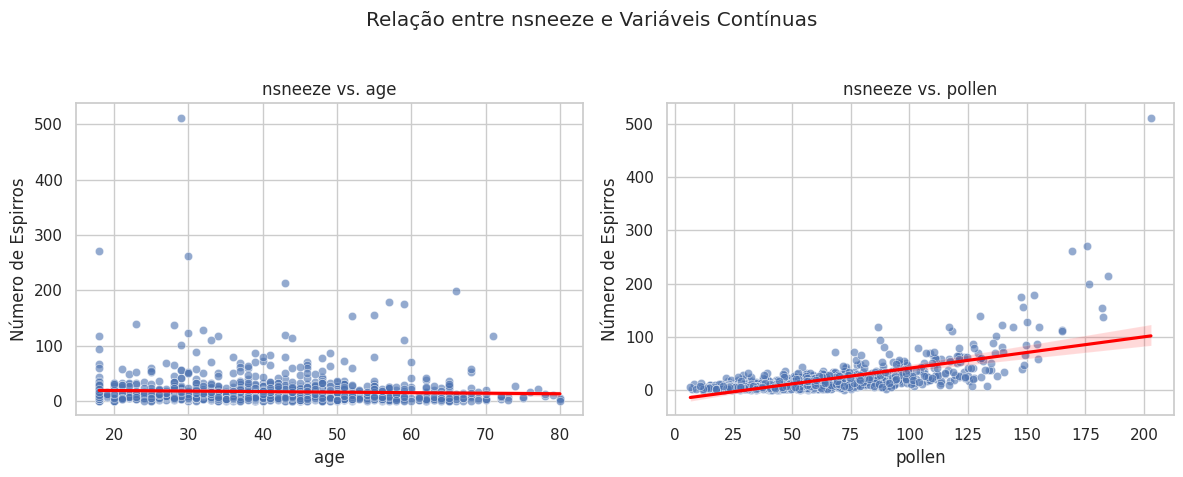


--- Coeficientes de Correlação (Pearson) ---
age      -0.047344
pollen    0.651861
Name: nsneeze, dtype: float64


In [180]:
continuous_vars = ['age', 'pollen']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Relação entre nsneeze e Variáveis Contínuas')

for i, var in enumerate(continuous_vars):
    sns.scatterplot(x=var, y='nsneeze', data=df, ax=axes[i], alpha=0.6)
    sns.regplot(x=var, y='nsneeze', data=df, ax=axes[i], scatter=False, color='red')
    axes[i].set_title(f'nsneeze vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Número de Espirros')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Coeficientes de Correlação (Pearson) ---")
print(df[['nsneeze', 'age', 'pollen']].corr().loc['nsneeze', ['age', 'pollen']])

/tmp/ipython-input-3991340563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3991340563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3991340563.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


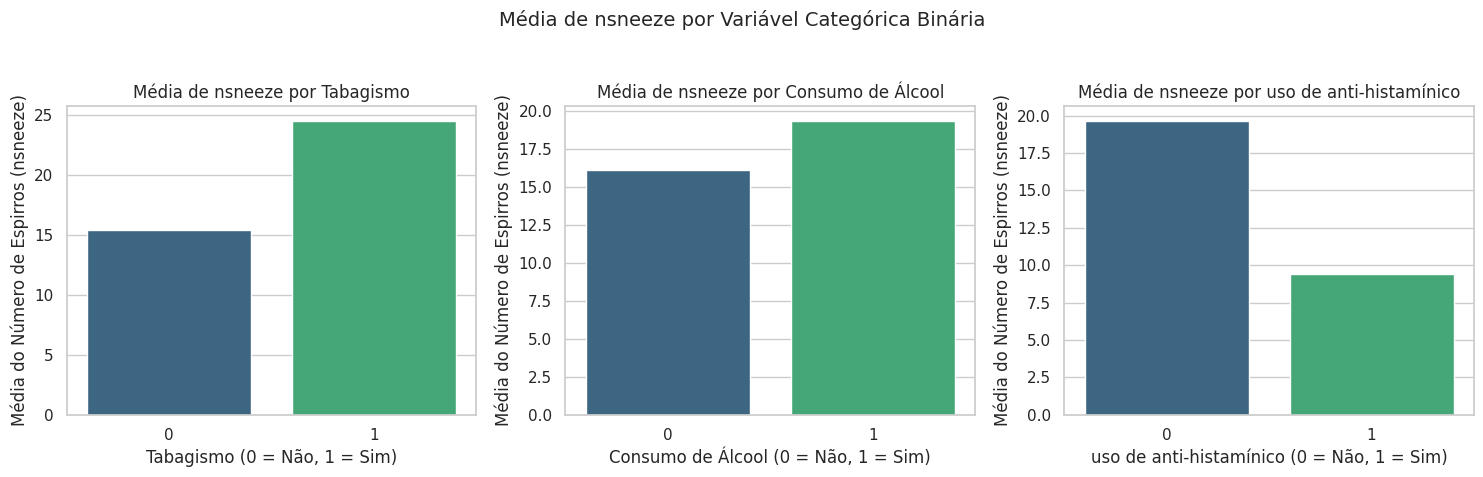

In [181]:
categorical_vars = ['smoker', 'alcohol', 'antihist']

titles_map = {'smoker': 'Tabagismo', 'alcohol': 'Consumo de Álcool', 'antihist': 'uso de anti-histamínico'}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Média de nsneeze por Variável Categórica Binária', fontsize=14)

for i, var in enumerate(categorical_vars):
    group_means = df.groupby(var)["nsneeze"].mean()
    sns.barplot(
        x=group_means.index.astype(str),
        y=group_means.values,
        ax=axes[i],
        palette="viridis"
    )

    axes[i].set_title(f'Média de nsneeze por {titles_map[var]}')
    axes[i].set_xlabel(f'{titles_map[var]} (0 = Não, 1 = Sim)')
    axes[i].set_ylabel('Média do Número de Espirros (nsneeze)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [182]:
corr_vars = ['nsneeze', 'age', 'pollen']
corr_matrix = df[corr_vars].corr(method='pearson')

print("--- Matriz de Correlação de Pearson ---")
print(corr_matrix)

print("\n--- Correlação de nsneeze com as preditoras ---")
print(corr_matrix.loc['nsneeze', ['age', 'pollen']])

--- Matriz de Correlação de Pearson ---
          nsneeze       age    pollen
nsneeze  1.000000 -0.047344  0.651861
age     -0.047344  1.000000  0.050600
pollen   0.651861  0.050600  1.000000

--- Correlação de nsneeze com as preditoras ---
age      -0.047344
pollen    0.651861
Name: nsneeze, dtype: float64


A variável nsneeze apresenta uma distribuição altamente assimétrica à direita, com muitos valores baixos e alguns poucos valores extremamente altos (outliers), o que também se reflete na variância elevada (≈ 758). A proporção de zeros é muito pequena (≈ 1,67%), indicando que praticamente todos os indivíduos apresentam algum nível de espirros. A análise visual reforça essa concentração de valores baixos e presença de cauda longa, sugerindo que transformações ou modelos capazes de lidar com overdispersion podem ser úteis em análises futuras.

Ao observar as variáveis categóricas, surgem associações interessantes: indivíduos fumantes (smoker = 1) e consumidores de álcool (alcohol = 1) apresentam médias de espirros maiores do que seus respectivos grupos de referência, sugerindo uma possível relação entre esses comportamentos e aumentos em nsneeze. O caso dos antihistamínicos é o oposto: usuários (antihist = 1) exibem uma média de espirros significativamente menor, coerente com o efeito esperado de redução dos sintomas alérgicos. Essas diferenças foram reforçadas pelos boxplots, mostrando maior dispersão e mais outliers nos grupos sem uso de antihistamínico e nos grupos fumantes.

Entre as variáveis contínuas, pollen se destaca como o preditor mais fortemente associado a nsneeze, com um coeficiente de correlação de aproximadamente 0,65, indicando um aumento consistente dos espirros conforme a concentração de pólen cresce. Já a idade apresenta correlação fraca e negativa (≈ –0.05), sugerindo pouca relevância direta. Assim, para fins analíticos, pollen, smoker, alcohol e antihist parecem ser as variáveis mais úteis para explicar a variabilidade de nsneeze, enquanto idade e outras dimensões visuais pouco contribuem para interpretações mais profundas.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [183]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [184]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Mon, 01 Dec 2025   Deviance:                       4949.1
Time:                        04:38:09   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

A partir do ajuste do modelo de regressão de Poisson, cada coeficiente foi interpretado por meio da razão de taxas (IRR), calculada como $IRR = e^{\beta}$. Para a variável alcohol, cujo coeficiente estimado foi $\beta = 0.2191$, obteve-se $e^{0.2191} = 1.24$, indicando que indivíduos que consumiram álcool apresentam um aumento de aproximadamente 24,5% na taxa esperada de espirros. O uso de anti-histamínicos apresentou coeficiente $\beta = -0.6449$, resultando em $e^{-0.6449} = 0.52$, o que corresponde a uma redução de cerca de 47,5% no número esperado de espirros. Para fumantes, com coeficiente $\beta = 0.4639$, o cálculo $e^{0.4639} = 1.59$ revela um aumento de 59% na taxa de espirros em comparação a não fumantes. A variável age apresentou coeficiente negativo ($\beta = -0.0114$), produzindo $e^{-0.0114} = 0.989$, o que implica uma redução aproximada de 1,1% na taxa de espirros por ano adicional de idade. Por fim, o nível de pólen, com coeficiente $\beta = 0.0229$, resultou em $e^{0.0229} = 1.023$, indicando que cada unidade adicional de pólen aumenta a taxa esperada de espirros em cerca de 2,3% . Esses resultados, todos estatisticamente significativos ($p < 0.001$), indicam que fatores comportamentais, ambientais e farmacológicos influenciam de maneira consistente o número de espirros observados.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [185]:
phi_estimado = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid
print(f"--- Método 1: Estatística Phi de Pearson ---")
print(f"Phi estimado: {phi_estimado:.4f}")
if phi_estimado > 1.5:
    print("Indicação: Forte superdispersão (Phi >> 1).")
else:
    print("Indicação: Ausência de superdispersão severa.")

print("\n" + "="*50 + "\n")

mu = ajuste_pois.fittedvalues
y = df['nsneeze']

aux_y = ((y - mu)**2 - y) / mu

ols_test = sm.OLS(aux_y, mu).fit()

print("--- Método 2: Teste de Cameron & Trivedi (Regressão Auxiliar) ---")
print(ols_test.summary())

print("\n--- Conclusão do Teste C.T. ---")
alpha_coef = ols_test.params[0]
p_valor = ols_test.pvalues[0]

print(f"Coeficiente alpha estimado: {alpha_coef:.4f}")
print(f"P-valor: {p_valor:.4e}")


--- Método 1: Estatística Phi de Pearson ---
Phi estimado: 4.2185
Indicação: Forte superdispersão (Phi >> 1).


--- Método 2: Teste de Cameron & Trivedi (Regressão Auxiliar) ---
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.234
Model:                            OLS   Adj. R-squared (uncentered):              0.233
Method:                 Least Squares   F-statistic:                              365.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                    2.43e-71
Time:                        04:38:09   Log-Likelihood:                         -4168.7
No. Observations:                1200   AIC:                                      8339.
Df Residuals:                    1199   BIC:                                      8345.
Df Model:                           1                                                  
Covariance Type:            no

/tmp/ipython-input-2765190952.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_coef = ols_test.params[0]
/tmp/ipython-input-2765190952.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_valor = ols_test.pvalues[0]


Ambos os métodos apontam para a existência de superdispersão significativa nos dados. A utilização do modelo de Poisson, neste cenário, resultaria em erros-padrão subestimados e inferências inválidas. Portanto, justifica-se a adoção de um modelo alternativo que trate a superdispersão, como o modelo Binomial Negativo.

In [186]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

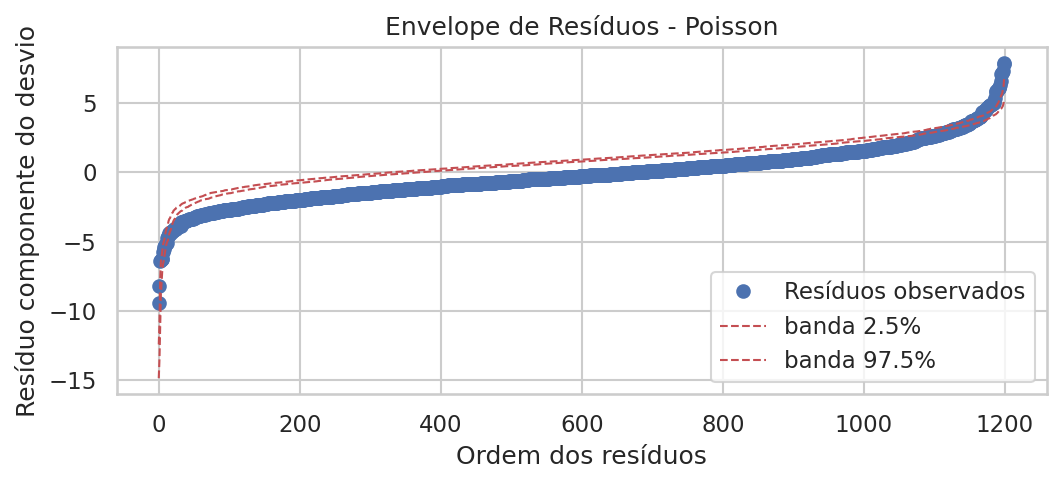

In [187]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Com base na convergência dos resultados de ambos os métodos, conclui-se que há evidências claras de superdispersão. Portanto, o modelo de Poisson não é adequado para descrever estes dados, pois subestima a variabilidade real da variável resposta.

A utilização deste modelo nessas condições levaria a erros-padrão subestimados e, consequentemente, a conclusões estatísticas (p-valores) equivocadamente otimistas. Recomenda-se o ajuste de modelos que flexibilizem a relação média-variância, como o modelo Binomial Negativo.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.
negrito

In [188]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# valor inicial fixado de alpha
alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

# alpha final utilizado pelo modelo (estimado)
alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3847.2
Date:                Mon, 01 Dec 2025   Deviance:                       1288.8
Time:                        04:38:10   Pearson chi2:                 1.24e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5615      0.059  

In [189]:
print("Deviance - Poisson:", ajuste_pois.deviance)
print("Deviance - Binomial Negativo:", ajuste_nb.deviance)

print("AIC - Poisson:", ajuste_pois.aic)
print("AIC - Binomial Negativo:", ajuste_nb.aic)

Deviance - Poisson: 4949.108383776753
Deviance - Binomial Negativo: 1288.8481368814223
AIC - Poisson: 9906.278039413422
AIC - Binomial Negativo: 7706.376159237092


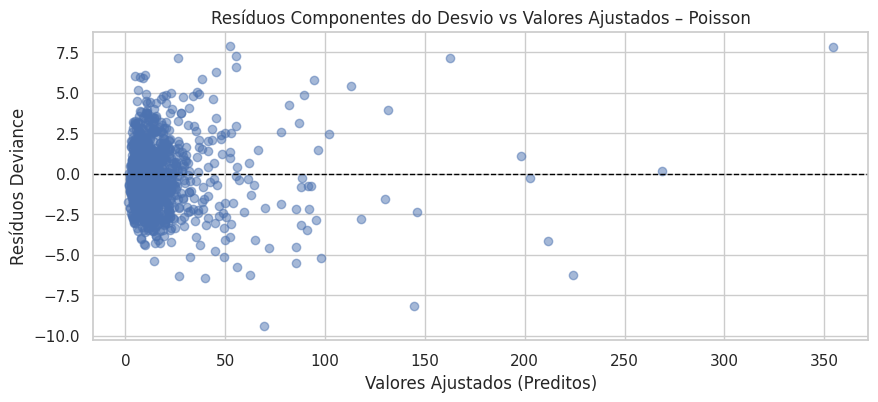

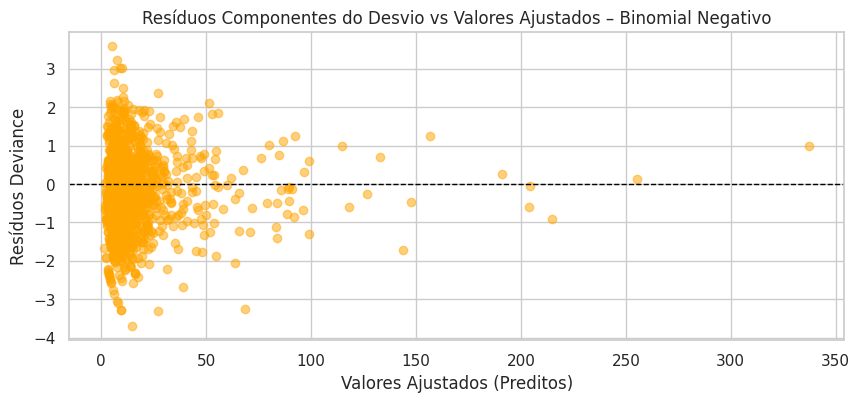

In [190]:
fig = plt.figure(figsize=(10, 4))
plt.scatter(ajuste_pois.fittedvalues, ajuste_pois.resid_deviance, alpha=0.5)
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.title("Resíduos Componentes do Desvio vs Valores Ajustados – Poisson")
plt.xlabel("Valores Ajustados (Preditos)")
plt.ylabel("Resíduos Deviance")
plt.show()

fig = plt.figure(figsize=(10, 4))
plt.scatter(ajuste_nb.fittedvalues, ajuste_nb.resid_deviance, alpha=0.5, color='orange')
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.title("Resíduos Componentes do Desvio vs Valores Ajustados – Binomial Negativo")
plt.xlabel("Valores Ajustados (Preditos)")
plt.ylabel("Resíduos Deviance")
plt.show()

Os resultados mostram que o modelo Binomial Negativo apresenta desempenho muito superior ao modelo de Poisson.
Primeiro, o deviance do Poisson (≈ 4949) é extremamente maior do que o deviance do Binomial Negativo (≈ 1289),
indicando que o modelo de Poisson não consegue acomodar a variabilidade observada nos dados. Da mesma forma, o
AIC do Poisson (≈ 9906) é substancialmente maior que o do Binomial Negativo (≈ 7706), confirmando pior ajuste
mesmo após penalização pela complexidade.


Os gráficos de resíduos componentes do desvio reforçam essa conclusão: no modelo de Poisson, os resíduos
apresentam grande dispersão, padrões estruturados e caudas muito amplas, o que caracteriza superdispersão.
Já no modelo Binomial Negativo, os resíduos tendem a ficar mais concentrados e sem padrões claros, indicando
melhor adequação à variância dos dados.


Diante desses resultados, o modelo Binomial Negativo é claramente o mais adequado para descrever o número de
espirros, pois lida corretamente com a superdispersão e apresenta desempenho superior tanto nas métricas
(deviance e AIC) quanto nos diagnósticos gráficos.




**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [191]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


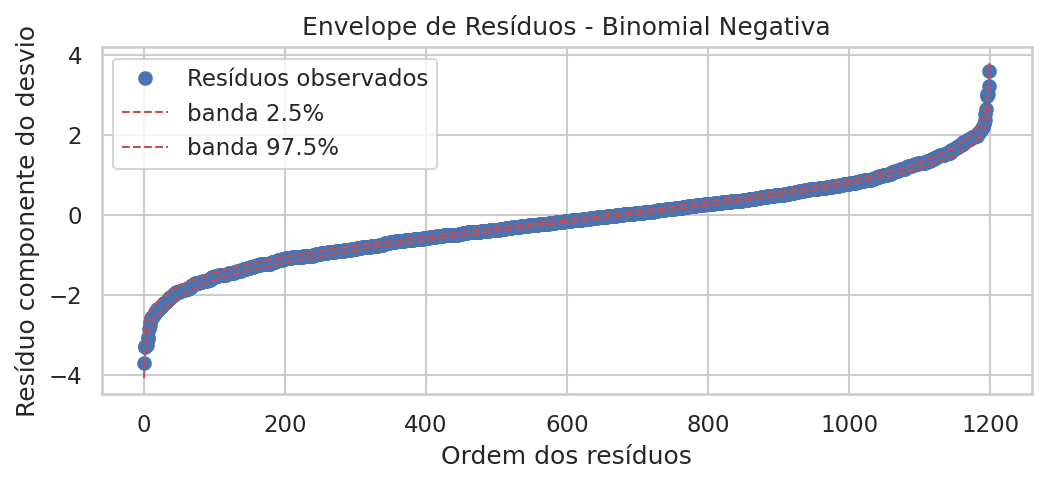

In [192]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [193]:
efeitos_marginais = ajuste_nb.get_margeff(at='overall')
print(efeitos_marginais.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.6444      0.588      6.202      0.000       2.493       4.796
C(antihist)[T.1]   -11.3616      0.729    -15.594      0.000     -12.790      -9.934
C(smoker)[T.1]       8.3986      0.703     11.950      0.000       7.021       9.776
age                 -0.1852      0.021     -8.801      0.000      -0.226      -0.144
pollen               0.3843      0.015     25.983      0.000       0.355       0.413


Consumo de álcool (alcohol):O efeito marginal médio estimado é de 3,64. Como o valor é positivo e o p-valor é significativo ($P < 0.001$), concluímos que o consumo de álcool está associado a um aumento médio de aproximadamente 3,64 espirros por dia em comparação aos indivíduos que não consomem álcool, mantendo as demais variáveis constantes.

Uso de anti-histamínico (antihist):O efeito marginal médio estimado é de -11,36. Como o valor é negativo e o p-valor é significativo ($P < 0.001$), concluímos que o uso de anti-histamínico está associado a uma redução média de aproximadamente 11,36 espirros por dia em comparação aos indivíduos que não usam o medicamento, mantendo as demais variáveis constantes.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [194]:
vars_cols = ['alcohol', 'antihist', 'smoker', 'age', 'pollen']

X = sm.add_constant(df[vars_cols])
y = df['nsneeze']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

modelo_pois_treino = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

modelo_nb_treino = sm.NegativeBinomial(y_train, X_train).fit()

pred_pois = modelo_pois_treino.predict(X_test)
pred_nb = modelo_nb_treino.predict(X_test)

eqm_pois = mean_squared_error(y_test, pred_pois)
eam_pois = mean_absolute_error(y_test, pred_pois)

eqm_nb = mean_squared_error(y_test, pred_nb)
eam_nb = mean_absolute_error(y_test, pred_nb)

print(f"--- Desempenho Preditivo (Base de Teste) ---")
print(f"Poisson           -> EQM: {eqm_pois:.4f} | EAM: {eam_pois:.4f}")
print(f"Binomial Negativo -> EQM: {eqm_nb:.4f} | EAM: {eam_nb:.4f}")

Optimization terminated successfully.
         Current function value: 3.188786
         Iterations: 15
         Function evaluations: 31
         Gradient evaluations: 23
--- Desempenho Preditivo (Base de Teste) ---
Poisson           -> EQM: 260.0507 | EAM: 7.0184
Binomial Negativo -> EQM: 251.0978 | EAM: 6.9898


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


O modelo Binomial Negativo apresentou o melhor desempenho preditivo. Isso é evidenciado pelos valores menores tanto no Erro Quadrático Médio (251.10 vs 260.05) quanto no Erro Absoluto Médio (6.99 vs 7.02) em comparação ao modelo Poisson. Embora a diferença no erro absoluto seja sutil, a diferença maior no erro quadrático sugere que o modelo Binomial Negativo lida melhor com a variância dos dados e penaliza menos as grandes desvios.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [195]:
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto = df['pollen'].quantile(0.75)

print("Critérios de Pólen Adotados:")
print(f"- Baixa concentração (1º Quartil): {pollen_baixo:.2f}")
print(f"- Alta concentração (3º Quartil):  {pollen_alto:.2f}")
print("-" * 40)

perfis = pd.DataFrame({
    'alcohol': [0, 1],
    'antihist': [1, 0],
    'smoker': [0, 1],
    'age': [30, 50],
    'pollen': [pollen_baixo, pollen_alto]
})

perfis.index = ['Indivíduo A', 'Indivíduo B']

previsoes = ajuste_nb.predict(perfis)

print("\n--- Previsão do Número Esperado de Espirros ---")
for individuo, predicao in zip(perfis.index, previsoes):
    print(f"{individuo}: {predicao:.4f} espirros esperados")

Critérios de Pólen Adotados:
- Baixa concentração (1º Quartil): 38.02
- Alta concentração (3º Quartil):  74.42
----------------------------------------

--- Previsão do Número Esperado de Espirros ---
Indivíduo A: 4.1635 espirros esperados
Indivíduo B: 30.0344 espirros esperados
